# Resumen

### `OLS con X e Y estacionarias:`
0. Confirmar que X e Y sean estacionarias (es decir, I(0) en niveles).
    - Usamos Dickey Fuller para evaluar eso.
    - Luego hacer ACF y PACF para hipotetizar si los residuos van a estar autocorrelacionados o no (podrían correlacionar, por ejemplo, si X es AR(1) e Y es AR(12)).
1. Confirmar que los errores son estacionarios.
    - Deberían serlo, ya que X e Y lo son.
2. Si los errores estan correlacionados, podemos modelar eso con AR(p), MA(q), o ARMA(p,q), corrijiendo así la violación del supuesto de Gauss Markov.
    * Podrían correlacionar, por ejemplo, si X es AR(1) e Y es AR(12).
3. Identificamos si es un AR, MA o ARMA con los graficos de ACF y PACF.
    * AR(1): veriamos que el PACF se escapa hasta el rezago 1. Si rho es +, el ACF tiene que decaer suavemente. Si es negativo, deca oscilando entre positivos y negativos.
    * AR(p>1): veriamos que el PACF se escapa hasta el rezago p. El ACF puede tener cualquier forma.
    * MA(p): veriamos en el ACF que se escapan todos los rezagos hasta p.
    * Ver nb `Ejemplo_AR_MA.ipynb`
    * Cuando es ARMA(p, q):
        * Hacemos un guess ARMA(p, q) y miramos si nos queda solo ruido blanco.
        * Si no nos queda solo ruido blanco, volvemos a probar otro guess.
4. Corro un nuevo OLS avisandole al software que los residuos siguen un ARMA(p,q)
5. Evaluo que los residuos sean ruido blanco.

### `OLS con X y/o Y NO estacionarias I(1):`
1. Entonces, residuos tampoco deberían ser estacionarios. Comprobar con Dickery Fuller.
    - Si los residuos SON estacionarios I(0), estamos hablando de `cointegración`, y sigo con paso 2 de `OLS con X e Y estacionarias`.
    -  Tamnbién podría hacer `VAR` (ver más abajo)

ESTO QUE SIGUE ES INCORRECTO CREO:

2. Si no lo son, tomo diferencias hasta rechazar adfuller y saber su orden de integración.
3. Hago OLS con la/s serie/s diferenciada/s.
3. A la nueva serie estacionaria, hago PACF y ACF para inferir como corregirla.
4. Corro una nueva regresión lineal diciendo que los residuos siguen, por ejemplo, un ARIMA(p, q).
    - OJO la interpretacion: ahora no regresamos X en Y, si no delta_x en Y (por ejemplo).

### `Si una serie es NO estacionaria:`
0. Tiene tendencia determinística:
    - Se rompe el supuesto de esperanza constante, no así la de la varianza constante.
    - Detrending: les resto el componente deterministico. Es decir, la nueva serie me queda residuos + intercept.
1. Tiene tendencia estocástica:
    - Se rompe el supuesto de varianza constante, no así la de la esperanza constante.
    - Metodología `Box-Jenkins`:
        1. Tomo i diferencias hasta que Dickey Fuller rechace. Entonces, digo que es I(i).
        2. A la nueva serie estacionaria, hago PACF y ACF para hacer un guess del ARMA(p,q).
        3. Modelo la serie en niveles como ARIMA(p, i, q).
        4. Evaluo que los residuos sean ruido blanco. Si no, vuelvo a paso 2.
        5. De todos los que resulten en ruido blanco, elijo el de AIC más grande en valor absoluto.
2. Puede que ocurran ambas!
3. Para saber si un proceso AR(p) es estacionario, hay que ver si todas las raices del polinomio son > 1 (ver ultimo cuestionario).
    - Un proceso MA(q) siempre es estacionario.
    - En el fondo, eso es lo que hace el test adfuller. Si es AR(1), mira si rho es < 1. Si es AR(p), hace lo del polinomio.

    `Determistica y/o estocastica:`
    * Hacemos ADF con cons='ct' y hacemos OLS de la serie regresada en el tiempo con rezagos (como hace stata):
        * Si rechazo ADF y OLS: I(0) con tendencia determinística. Hacemos detrending y le corremos ADF con cons='c' (debería rechazar).
        * Si no rechazo ADF y rechazo OLS: es I(1). Corremos ADF con cons='c' tomando diferencias (de ser necesario) hasta rechazar.
        * Si rechazo ADF y no rechazo OLS: es I(0).
        * Si no rechazo ADF y no rechazo OLS: es I(i). Corro ADF con cons='c' y tomo diferencias (de ser necesario) hasta rechazar.
    * Fernando: "la solución pragmática es incluir tendencia determinística si hay una razón de sentido común que lo avale (precios, depósitos), y si no, no incluirla (retornos, inflación)".

### `Si una serie es estacionaria:`
1. Metodología Box-Jenkins, pero sin el paso 1 (ya sabemos que es I(0))

### `Para relacionar dos series estacionarias de tipo AR(p):`

1. Caso 1:
    - Los lambdas en valores absoluto son <1, entonces Z1 y Z2 (y, consecuentemente, Y1t e Y2t) van a ser I(0).
    - Usaremos `VAR(p)`.
        1. Confirmar que ambas series sean I(0). Ver sección `Determistica y/o estocastica`.
        2. Hacemos un ajuste inicial sin especificar maxlags y elejimos un maxlags apropiado con Selection Order Criteria.
        3. Hacemos un guess
        4. Satisfecho con el guess, evalúo la estabilidad del modelo (que no haya raices unitarias ni residuos autocorrelacionados)
2. Caso 2:
    - Si lambda2 en valor absoluto es <1 y lambda1 en valor absoluto es =1.
        - Entonces Z2 va a ser I(0) y Z1 va a ser Random Walk con drift, es decir I(1).
        - Consecuentemente, Y1t e Y2t seran I(1).
        - Podríamos llegar a encontrar una combinación lineal de Y1t e Y2t que sea estacionaria (eso sería Z2).
            - Si la encontrasemos, sería cointegración.
            - Si no la encontraramos, sería regresión espuria.
        - Usaremos VEC (no entra en examen).

1. si ambas X e Y son series de tiempo I(0), mejor ir directo a VAR que usar OLS?
  * Depende nuestra hipotesis, si pensamos que claramente una causa a la otra hacemos OLS. 
    * En el ejemplo de inflación y crec_m, hacemos VAR ya que ambas se cuasan entre sí.
  * Admás, OLS solo mira un rezago.
2. caso donde X e Y son I(1) y residuos de OLS son I(0), vamos por VEC o podemos hacer OLS?
    * Es cointegracion y hacemos OLS.
3. que pasa si quiero regresar X en Y y alguna no es I(0)? 
 * ej: CLASE_9.ipynb. Tomo diferencias hasta que sean I(0) e interpreto acorde?
 * acá me rechaza con el Dickey-Fuller aumentado pero no con el generalizado
4. que pasa en estos casos si no son estacionarios no por ser estocasticos si no por tener tendencia estocastica?


# Ejemplos:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.tsa.api as tsa
import statsmodels.stats.api as sms

from scipy.stats import ttest_1samp

### `OLS con X e Y estacionarias:`

Justo en este ejemplo podríamos usar un VAR(p), tendría más poder estadístico. En palabras de Fernando: "este análisis es muy limitado porque solo estas viendo si hay un efecto contemporáneo, o sea, en el mismo "t". VAR es una metodología mucho más acorde para estas variables, porque ambas deberían considerarse endógenas."

In [2]:
df = pd.read_excel("./Clase 7/Precios_y_Dinero.xlsx").rename({'M ': 'M'}, axis=1)
df.head()

,MMYY,IPC,M,M_en_ARS
0,2003-01-01,100.000000,100.000000,29609.920333
1,2003-02-01,100.566796,99.359830,29420.366429
2,2003-03-01,101.155116,102.628052,30388.084290
3,2003-04-01,101.212513,104.258927,30870.985333
4,2003-05-01,100.817908,111.804321,33105.170323


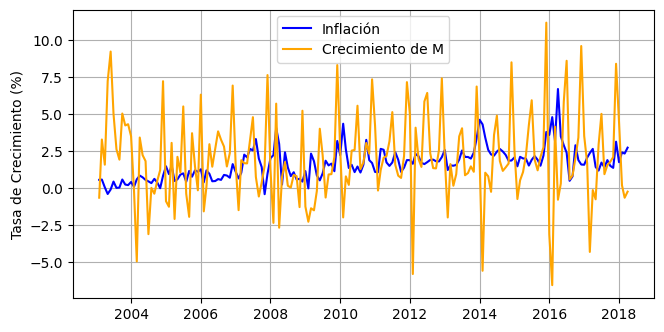

In [3]:
# Trabajo con inflación y crecimiento monetario porque ya se que van a ser estacionarias :)
df['inflacion'] = (df['IPC'] - df['IPC'].shift(1)) / df['IPC'].shift(1) * 100
df['crec_m'] = (df['M'] - df['M'].shift(1)) / df['M'].shift(1) * 100

plt.figure(figsize=(10*.75, 5*.75))
plt.plot(df['MMYY'], df['inflacion'], label='Inflación', color='blue')
plt.plot(df['MMYY'], df['crec_m'], label='Crecimiento de M', color='orange')
plt.ylabel('Tasa de Crecimiento (%)')
plt.legend()
plt.grid()
plt.show()

0. Confirmar que X e Y sean estacionarias (es decir, I(0) en niveles).
    - Usamos Dickey Fuller para evaluar eso.

In [ ]:
# Rechazo: evidencia de estacionariedad 
# (ojo, solo rechazo con regression='ct' pero no con regression='c'), tendría que hacer detrending

y = df['inflacion'].dropna()
adf = adfuller(y, regression='ct', autolag='AIC')  # autolag='t-stat' sería NG-Perron
print(adf[0], adf[1])  # estadístico, p-valor

-7.720398146539171 3.163671660812864e-10


In [5]:
# Rechazo: evidencia de estacionariedad
y = df['crec_m'].dropna()
adf = adfuller(y, regression='c', autolag='AIC')  # 'c' si solo intercepto; 'ct' si hay tendencia
print(adf[0], adf[1])  # estadístico, p-valor

-3.1372591600944184 0.023915925664001258


In [6]:
# Por las dudas, hacemos también Dickey-Fuller GLS (el de arriba era el aumentado)
from arch.unitroot import DFGLS
dfgls = DFGLS(y, trend='ct')
print(dfgls.stat, dfgls.pvalue)

-2.9462364239212 0.03990333903323401


1. Confirmar que los errores son estacionarios.
    - Deberían serlo, ya que X e Y lo son.

In [7]:
df_reg = df[['inflacion', 'crec_m']].dropna()
X = df_reg[['crec_m']]
y = df_reg['inflacion']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              inflacion   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.2784
Date:                Wed, 27 Aug 2025   Prob (F-statistic):              0.598
Time:                        20:09:24   Log-Likelihood:                -268.79
No. Observations:                 183   AIC:                             541.6
Df Residuals:                     181   BIC:                             548.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6835      0.095     17.790      0.0

<Axes: title={'center': 'Residuales del modelo'}, ylabel='Residuales'>

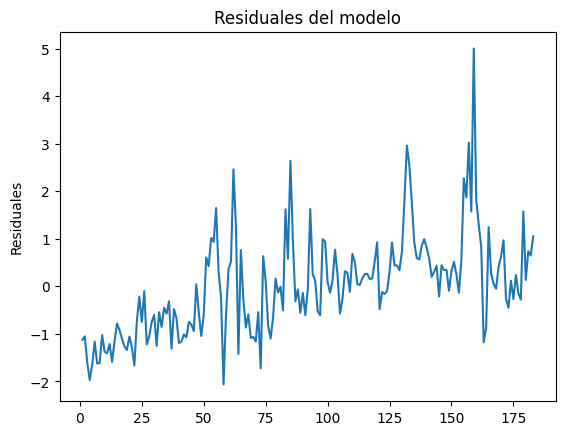

In [8]:
# Sugiere componente deterministico, es decir, correr el ADF con regression='ct'
model.resid.plot(title='Residuales del modelo', ylabel='Residuales')

In [9]:
# Rechazo: evidencia de estacionariedad
adf = adfuller(model.resid, regression='ct', autolag='AIC')  # 'c' si solo intercepto; 'ct' si hay tendencia
print(adf[0], adf[1])  # estadístico, p-valor

-7.835895529387655 1.7115195586738324e-10


2. Si los errores estan correlacionados, podemos modelar eso con AR(p), MA(q), o ARMA(p,q), corrijiendo así la violación del supuesto de Gauss Markov.

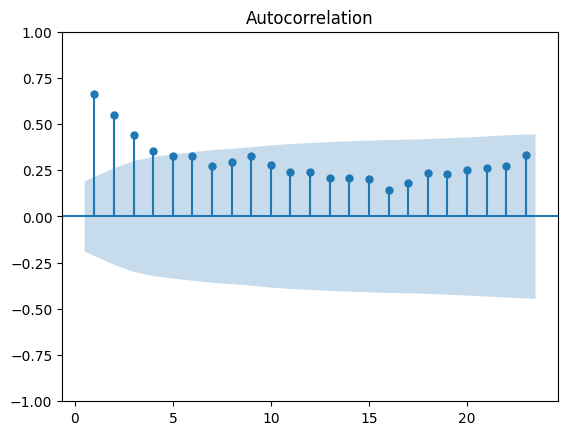

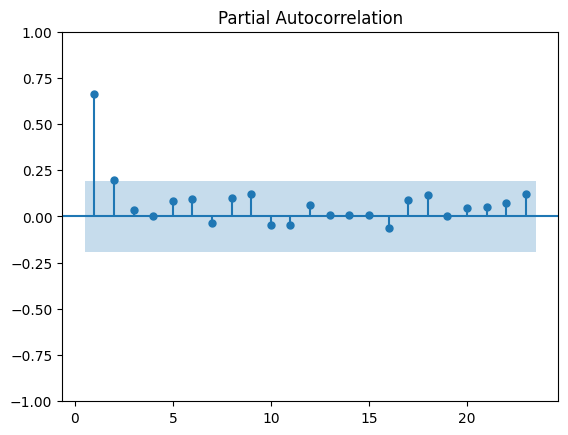

In [10]:
# Gráfico de autocorrelación de los residuos
plot_acf(model.resid, zero=False, alpha=0.01)
plot_pacf(model.resid, zero=False, alpha=0.01)
plt.show()

4. Corro un nuevo OLS avisandole al software que los residuos siguen un ARMA(p,q).

Me la juego que es un AR(2)

In [11]:
# Prepara los datos
df_reg = df[['inflacion', 'crec_m']].dropna()
X = df_reg[['crec_m']]
y = df_reg['inflacion']

# Añadir constante a las variables independientes
# X = sm.add_constant(X)

# Ajuste ARMA(p, q)
# Definir el modelo ARMA con la regresión
model = tsa.ARIMA(y, exog=X, order=(2, 0, 0)) 

# Ajustar el modelo
results = model.fit()

# Mostrar el resumen del modelo
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:              inflacion   No. Observations:                  183
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -210.503
Date:                Wed, 27 Aug 2025   AIC                            431.006
Time:                        20:09:25   BIC                            447.053
Sample:                             0   HQIC                           437.511
                                - 183                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6288      0.248      6.563      0.000       1.142       2.115
crec_m         0.0130      0.015      0.878      0.380      -0.016       0.042
ar.L1          0.5500      0.068      8.084      0.0

/opt/homebrew/Caskroom/miniforge/base/envs/env-udesa/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/env-udesa/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/env-udesa/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


5. Evaluo que los residuos sean ruido blanco

In [12]:
# Supuesto de no autocorrelación 
# H0: es ruido blanco
lb_test = acorr_ljungbox(results.resid, lags=[10], return_df=True)
lb_test

,lb_stat,lb_pvalue
10,8.161875,0.613029


<Axes: title={'center': 'Residuales del modelo'}, ylabel='Residuales'>

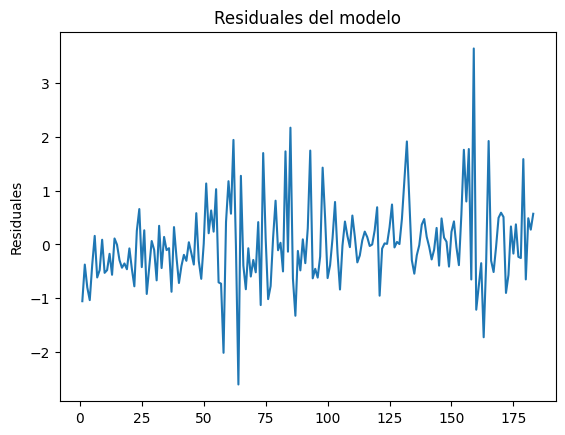

In [13]:
# Sugiere componente deterministico, es decir, correr el ADF con regression='ct'
results.resid.plot(title='Residuales del modelo', ylabel='Residuales')

In [14]:
### Supuesto de esperanza = 0
# H0: media = 0
t_stat, p_value = ttest_1samp(results.resid, 0)
print(p_value)

0.9145729871165547


In [15]:
### Supuesto de varianza constante
# Test de heterocedasticidad de White. 
# H0 = homoscedasticidad
white_test = sms.het_white(results.resid, results.model.exog)
print(f"LM p-value (el estadístico): {white_test[0]}     F p-value: {white_test[1]}")

LM p-value (el estadístico): 4.660739919537974     F p-value: 0.09725975823504072


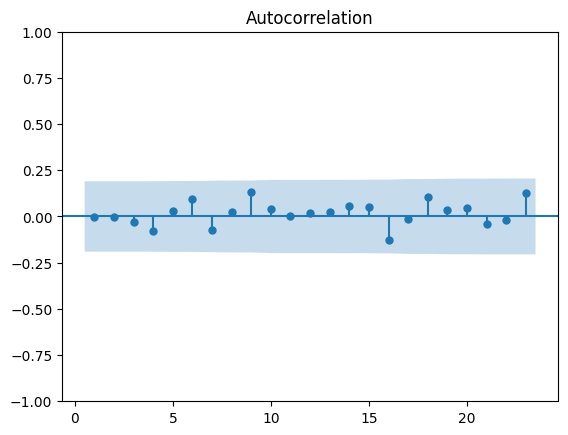

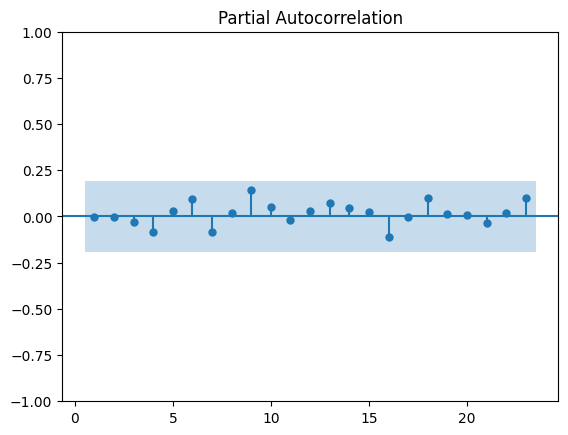

In [16]:
### Supuesto de no autocorrelación
# Gráfico de autocorrelación de los residuos
plot_acf(results.resid, zero=False, alpha=0.01)
plot_pacf(results.resid, zero=False, alpha=0.01)
plt.show()

### `Si una serie es NO estacionaria:`

Metodología Box-Jenkins

In [17]:
df = pd.read_excel('./Clase 8/wheat.xlsx')
df.head()

,yearmm,wheat_srw,wheat_hrw
0,1980M01,169.71,175.63
1,1980M02,170.49,172.70
2,1980M03,162.40,163.51
3,1980M04,155.80,156.53
4,1980M05,156.20,161.30


In [18]:
# Tiempo como indice
inicio = pd.to_datetime(df['yearmm'].iloc[0], format='%YM%m').strftime('%Y-%m')
df['date'] = pd.period_range(start=inicio, periods=len(df), freq="M")
df = df.set_index("date")

# Retornos logaritmicos
df["wheat_srw"] = pd.to_numeric(df["wheat_srw"], errors="coerce")
df["dlws"] = np.log(df["wheat_srw"]).diff()

y = df["dlws"].dropna()

1. Tomo i diferencias hasta que Dickey Fuller rechace. Entonces, digo que es I(i).

En este caso, es I(0).

<Axes: title={'center': 'Retornos logaritmicos'}, xlabel='date'>

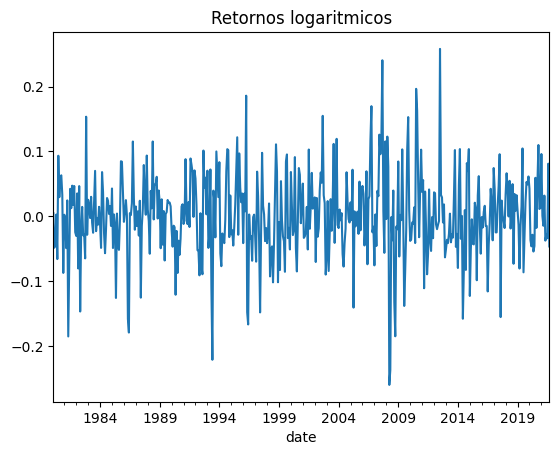

In [19]:
# Sugiere componente deterministico, es decir, correr el ADF con regression='ct'
y.plot(title='Retornos logaritmicos')

In [20]:
# Rechazo: evidencia de estacionariedad
adf = adfuller(y, regression='ct', autolag='AIC')
print(adf[0], adf[1])  # estadístico, p-valor

-8.329124154425129 1.2411244224710942e-11


2. A la nueva serie estacionaria, hago PACF y ACF para hacer un guess del ARMA(p,q).

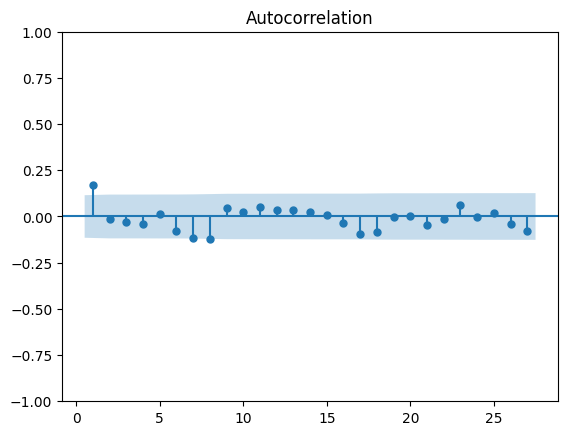

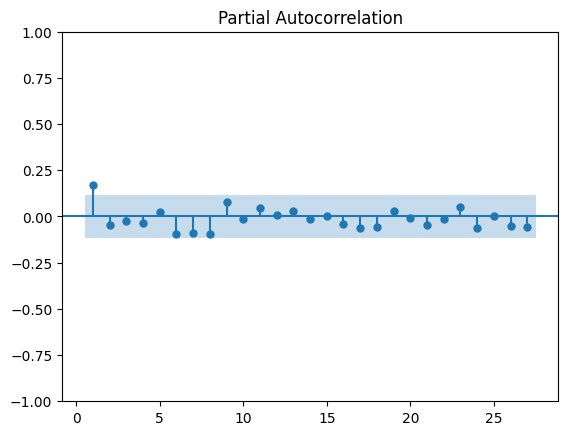

In [21]:
### Supuesto de no autocorrelación
# Gráfico de autocorrelación de los residuos
plot_acf(y, zero=False, alpha=0.01)
plot_pacf(y, zero=False, alpha=0.01)
plt.show()

3. Modelo la serie en niveles como ARIMA(p, i, q).

En este caso, ARIMA(1,0,0) (para casos más complejos, ver nb `CLASE_8.ipynb`)

In [22]:
m1 = SARIMAX(y, order=(1,0,1), trend="c", enforce_invertibility=False)
r1 = m1.fit(disp=False)
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   dlws   No. Observations:                  500
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 669.235
Date:                Wed, 27 Aug 2025   AIC                          -1330.469
Time:                        20:09:25   BIC                          -1313.611
Sample:                    02-29-1980   HQIC                         -1323.854
                         - 09-30-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0009      0.004      0.251      0.802      -0.006       0.008
ar.L1         -0.0381      0.266     -0.143      0.886      -0.559       0.483
ma.L1          0.2178      0.259      0.840      0.401      -0.291       0.726
sigma2         0.0040      0.000     21.164      0.000       0.004       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                59.68
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.42   Skew:                            -0.11
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

4. Evaluo que los residuos sean ruido blanco. Si no, vuelvo a paso 2.

Test de Ruido Blanco
con 10 lags

In [23]:
# H0: es ruido blanco
lb_test = acorr_ljungbox(r1.resid, lags=[10], return_df=True)
lb_test

,lb_stat,lb_pvalue
10,17.632099,0.061496


In [24]:
# Inverse roots test.
ar_roots = r1.arroots
ma_roots = r1.maroots

inv_ar_roots = 1 / r1.arroots
inv_ma_roots = 1 / r1.maroots

print("Inversas AR roots:\n", inv_ar_roots)
if np.all([i < 1 for i in inv_ar_roots]):
    print("Todas las inversas de las raíces AR estan en el interior del círculo unitario.")
else:
    print("Algunas inversas de las raíces AR no estan en el circulo unitario.")

print("\n\nInversas MA roots:\n", inv_ma_roots)
if np.all([i < 1 for i in inv_ma_roots]):
    print("Todas las inversas de las raíces MA estan en el interior del círculo unitario.")
else:
    print("Algunas inversas de las raíces MA no estan en el circulo unitario.")

Inversas AR roots:
 [-0.03809782]
Todas las inversas de las raíces AR estan en el interior del círculo unitario.


Inversas MA roots:
 [-0.21782923]
Todas las inversas de las raíces MA estan en el interior del círculo unitario.


### `VAR(p): Para relacionar dos series estacionarias de tipo AR(p):`

In [25]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from arch.unitroot import DFGLS

In [26]:
df = pd.read_stata("./Clase 9/Precios_y_Dinero_data.dta")

inicio = pd.to_datetime(df['mmyy'].iloc[0], format='%b-%y').strftime('%Y-%m')
df["yearmm"] = pd.period_range(start=inicio, periods=len(df), freq="M")
df = df.set_index("yearmm")
df['ipc'] = df['ipc'].astype(float)
df['m'] = df['m'].astype(float)
df.head()

,mmyy,ipc,m,m_en_ars
yearmm,,,,
2003-01,Jan-03,100.00,100.00,29609.92
2003-02,Feb-03,100.57,99.36,29420.37
2003-03,Mar-03,101.16,102.63,30388.08
2003-04,Apr-03,101.21,104.26,30870.99
2003-05,May-03,100.82,111.80,33105.17


In [27]:
# Generamos las variables Inflación y Tasa de Crecimiento de la Base Monetaria
df["infl"] = df["ipc"] / df["ipc"].shift(1) - 1
df["crec_m"] = df["m"] / df["m"].shift(1) - 1
df = df[['infl','crec_m']]

1. Chequear que ambas series sean I(0).

In [28]:
# Rechazo H0: La serie es estacionaria
test = DFGLS(df["infl"].dropna(),trend="c")
print("Inflación")
print(test.summary())

Inflación
      Dickey-Fuller GLS Results      
Test Statistic                 -3.295
P-value                         0.001
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -2.68 (1%), -2.06 (5%), -1.74 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [29]:
# NO rechaza H0: La serie es NO estacionaria
# Acá fingimos demensia y decimos que la serie es estacionaria (nb tp_7NEW.ipynb si me rechaza)
test = DFGLS(df["crec_m"].dropna(),trend="c")
print("Tasa de Crecimiento de la Base Monetaria")
print(test.summary())

Tasa de Crecimiento de la Base Monetaria
      Dickey-Fuller GLS Results      
Test Statistic                 -1.174
P-value                         0.227
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -2.68 (1%), -2.06 (5%), -1.75 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


2. Hacemos un ajuste inicial sin especificar maxlags y elejimos un maxlags apropiado con Selection Order Criteria.

In [30]:
model = VAR(df[["infl", "crec_m"]].dropna())

# Según AIC, maxlags=13
print(model.select_order().summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -16.27      -16.24   8.561e-08      -16.26
1       -16.73     -16.62*   5.441e-08      -16.68
2       -16.79      -16.60   5.127e-08      -16.71
3       -16.83      -16.57   4.923e-08     -16.72*
4       -16.82      -16.49   4.935e-08      -16.69
5       -16.81      -16.40   5.025e-08      -16.64
6       -16.82      -16.34   4.960e-08      -16.63
7       -16.84      -16.29   4.863e-08      -16.62
8       -16.83      -16.20   4.918e-08      -16.57
9       -16.81      -16.11   5.025e-08      -16.52
10      -16.87      -16.10   4.714e-08      -16.56
11      -16.86      -16.01   4.764e-08      -16.52
12      -16.98      -16.06   4.232e-08      -16.61
13     -16.99*      -15.99  4.225e-08*      -16.58
14      -16.95      -15.88   4.377e-08      -16.52
--------------------------------------------------


3. Segundo guess

In [31]:
selected_lag = 13
result_var = model.fit(selected_lag)
print(result_var.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 27, Aug, 2025
Time:                     20:09:25
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -15.9800
Nobs:                     171.000    HQIC:                  -16.5695
Log likelihood:           1019.84    FPE:                4.27989e-08
AIC:                     -16.9721    Det(Omega_mle):     3.19223e-08
--------------------------------------------------------------------
Results for equation infl
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.002922         0.002082            1.403           0.161
L1.infl            0.488500         0.085379            5.722           0.000
L1.crec_m          0.011412         0.028064            0.407           0

4. Satisfecho con el guess, evalúo la estabilidad del modelo (que no haya raices unitarias ni residuos autocorrelacionados)

In [32]:
print(f"El modelo VAR({selected_lag}) es estable: {result_var.is_stable()}.")

roots = result_var.roots
print(f"Raíces del VAR({selected_lag}):")
display(roots)

print(np.abs(result_var.roots))

if np.any(np.abs(roots) < 1):
    print(f"El modelo VAR({selected_lag}) NO es estable.")
else:
    print(f"El modelo VAR({selected_lag}) es estable.")

El modelo VAR(13) es estable: True.
Raíces del VAR(13):


array([ 2.78943753e+02-0.j        ,  1.27130198e+00+0.41715393j,
        1.27130198e+00-0.41715393j, -5.00202805e-01+1.12212981j,
       -5.00202805e-01-1.12212981j, -8.12899955e-01-0.83131271j,
       -8.12899955e-01+0.83131271j,  8.03758244e-01+0.84014038j,
        8.03758244e-01-0.84014038j,  1.14622214e+00-0.j        ,
       -1.13280445e+00-0.j        , -1.07886026e+00+0.29282336j,
       -1.07886026e+00-0.29282336j,  2.62265041e-01+1.08492116j,
        2.62265041e-01-1.08492116j, -9.48832316e-01+0.56242934j,
       -9.48832316e-01-0.56242934j,  1.08637644e+00-0.j        ,
        9.54046014e-01-0.49194472j,  9.54046014e-01+0.49194472j,
       -5.60115322e-02-1.05572896j, -5.60115322e-02+1.05572896j,
       -5.15305119e-01+0.91002389j, -5.15305119e-01-0.91002389j,
        5.15158966e-01-0.87494769j,  5.15158966e-01+0.87494769j])

[278.94375331   1.33799332   1.33799332   1.22856752   1.22856752
   1.16270682   1.16270682   1.16269651   1.16269651   1.14622214
   1.13280445   1.1178931    1.1178931    1.11617063   1.11617063
   1.10300024   1.10300024   1.08637644   1.07341204   1.07341204
   1.05721376   1.05721376   1.04579293   1.04579293   1.0153434
   1.0153434 ]
El modelo VAR(13) es estable.


In [33]:
# H_0: residual autocorrelation up to lag x is zero
# NO rechazamos H0: los residuos no estan correlacionados :)
wb = result_var.test_whiteness(nlags=selected_lag+7)
print(wb)

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 20 is zero: fail to reject at 5% significance level. Test statistic: 39.813, critical value: 41.337>, p-value: 0.069>


In [34]:
p = result_var.k_ar
T = result_var.nobs

nlags = int(min(p + np.sqrt(T), T//5))
wb = result_var.test_whiteness(nlags=nlags)
print(wb)

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 26 is zero: reject at 5% significance level. Test statistic: 74.824, critical value: 69.832>, p-value: 0.021>


In [35]:
#### Testeo por Causalidad en Sentido de Granger
# Ejemplo: infl causa en el sentio de Granger a crec_m?
# Paso 1: ajusta una regresión de crec_m en p rezagos de infl.
# Paso 2: hace un test-f (todos los betas son 0).
# Rechazamos H0: infl causa en el sentio de Granger a crec_m

print(result_var.test_causality("infl", ["crec_m"], kind="f"))
print(result_var.test_causality("crec_m", ["infl"], kind="f"))

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: crec_m does not Granger-cause infl: fail to reject at 5% significance level. Test statistic: 1.717, critical value: 1.754>, p-value: 0.057>
<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: infl does not Granger-cause crec_m: reject at 5% significance level. Test statistic: 1.782, critical value: 1.754>, p-value: 0.045>


#### Encontrar raices de un poliniomio

Polinomio: a*x^2 + b*x + c

In [45]:
# Reales
import math, cmath

def raices_cuadratica(a,b,c):
    D = b*b - 4*a*c
    if D >= 0:
        sqrtD = math.sqrt(D)
    else:
        sqrtD = cmath.sqrt(D)
    return (-b + sqrtD)/(2*a), (-b - sqrtD)/(2*a)

print(raices_cuadratica(1, -3, 2))  # -> (2+0j, 1+0j)

(2.0, 1.0)


In [ ]:
# Imaginarios
import cmath

def raices_cuadratica(a, b, c):
    """
    Resuelve ax^2 + bx + c = 0 usando la resolvente.
    Devuelve (x1, x2). Soporta raíces complejas.
    """
    if a == 0:
        if b == 0:
            raise ValueError("a=b=0: no hay ecuación.")
        return (-c / b,)

    D = b*b - 4*a*c
    sqrtD = cmath.sqrt(D)
    x1 = (-b + sqrtD) / (2*a)
    x2 = (-b - sqrtD) / (2*a)
    return x1, x2

# Ejemplo:
print(raices_cuadratica(1, -3, 2))  # -> (2+0j, 1+0j)

((2+0j), (1+0j))


In [44]:
import numpy as np

# AR(2): x_t = phi1 x_{t-1} + phi2 x_{t-2} + e_t
# Polinomio característico en z: z^2 - phi1 z - phi2 = 0

def ar2_roots(phi1, phi2):
    return np.roots([1, -phi1, -phi2])  # devuelve complejos

def ar2_is_stationary(phi1, phi2, tol=1e-12):
    r = ar2_roots(phi1, phi2)
    return bool(np.all(np.abs(r) - 1 > tol)), r

# Ejemplo
ok, r = ar2_is_stationary(0.5, 0.2)
print('Stationary?', ok, 'roots:', r, 'moduli:', np.abs(r))

Stationary? False roots: [ 0.76234754 -0.26234754] moduli: [0.76234754 0.26234754]


### `Determistica y/o estocastica`

In [3]:
df = pd.read_stata("Clase 10/parcialito/MIA103_Final_Ejer_2_250823.dta")
df = df.set_index("t")
df.head()

,RBER_AR,RBER_AR_sd6
t,,
2010-01-01,98.870003,1.225477
2010-02-01,100.620003,1.976474
2010-03-01,99.820000,2.138749
2010-04-01,99.349998,1.786254
2010-05-01,102.059998,1.618118


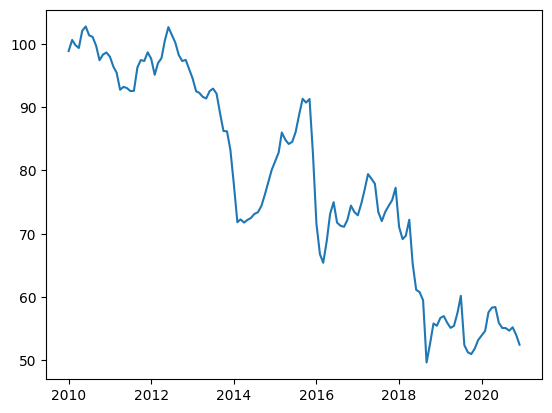

In [4]:
plt.plot(df['RBER_AR'])

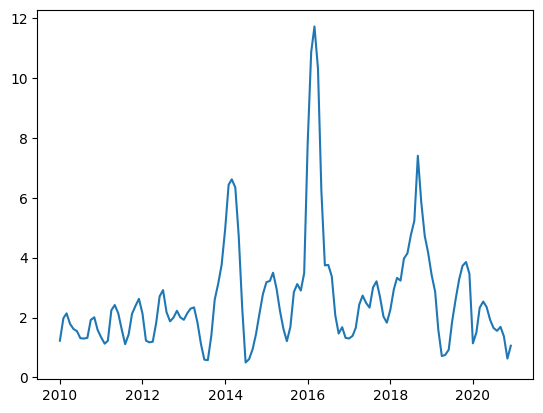

In [5]:
plt.plot(df['RBER_AR_sd6'])

b)

RBER_AR es I(0) con tendencia determinista, mientras que RBER_AR_sd6 es I(0).

In [12]:
# Con regression='c': es I(0)

y = df['RBER_AR_sd6'].dropna()
adf = adfuller(y, regression='c', autolag='AIC')
print(adf[0], adf[1])

-4.275830716114617 0.000489025626409123


Corro regresión que hace stata de fondo para saber si hay tendencia deterministica

In [24]:
y = df["RBER_AR"].dropna().astype(float)

# 1) corre ADF para saber cuántos lags usó (autolag AIC en este ejemplo)
adf_stat, pval, k_lags, nobs, crit, icbest = adfuller(y, regression="ct", autolag="AIC")
print("ADF stat:", adf_stat, "p-val:", pval, "lags:", k_lags)

ADF stat: -3.7043618301512495 p-val: 0.022071616204801303 lags: 1


In [ ]:
# 2) construí la regresión ADF equivalente

T = len(y)
t = np.arange(1, T+1) # tendencia lineal
dy = y.diff()

X = pd.DataFrame({
"const": 1.0,
"trend": t,
"y_lag1": y.shift(1),
})

# agrega Δy_{t-i}, i=1..k
for i in range(1, k_lags+1):
    X[f"dy_lag{i}"] = dy.shift(i)

# variable dependiente: Δy_t
Y = dy

# 3) alineá y ajustá OLS
data = pd.concat([Y, X], axis=1).dropna()
Y_ols = data.iloc[:, 0]
X_ols = data.iloc[:, 1:]

res = sm.OLS(Y_ols, X_ols).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                RBER_AR   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     10.19
Date:                Fri, 29 Aug 2025   Prob (F-statistic):           4.69e-06
Time:                        16:55:06   Log-Likelihood:                -293.33
No. Observations:                 130   AIC:                             594.7
Df Residuals:                     126   BIC:                             606.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7003      3.778      3.627      0.0

In [27]:
# 4) Conclusión

if res.pvalues["trend"] < 0.05:
    print("Rechazo H0: la serie tiene tendencia determinística.")
else:
    print("No se rechaza H0: la serie no tiene tendencia determinística.")

Rechazo H0: la serie tiene tendencia determinística.


In [ ]:
# Con regression='ct' rechazo -> es I(0) con tendencia determinística
# Tengo que ver también OLS

y = df['RBER_AR'].dropna()
adf = adfuller(y, regression='ct', autolag='AIC')
print(adf[0], adf[1])

-3.7043618301512495 0.022071616204801303


In [32]:
# Resto tendencia determinista
df['RBER_AR_detrended'] = res.resid + res.params["const"]

-10.96827547730437 8.000099040783208e-20


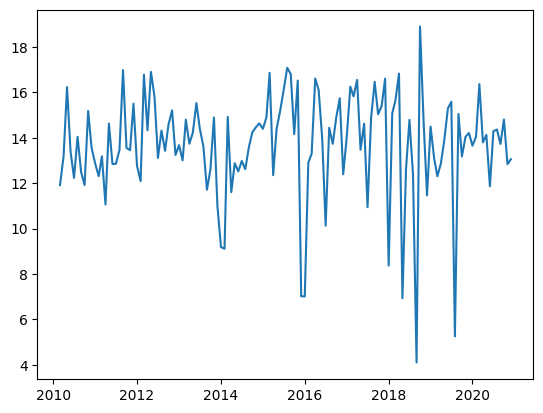

In [33]:
# Rechazo! Es I(0) con tendencia determinista
y = df['RBER_AR_detrended'].dropna()
adf = adfuller(y, regression='c', autolag='AIC')
print(adf[0], adf[1])

plt.plot(df['RBER_AR_detrended'])